# 每週發文數量

/var/folders/32/17fwcjcd1kv9vkdd_3w2k4vw0000gn/T/ipykernel_1721/2358973741.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


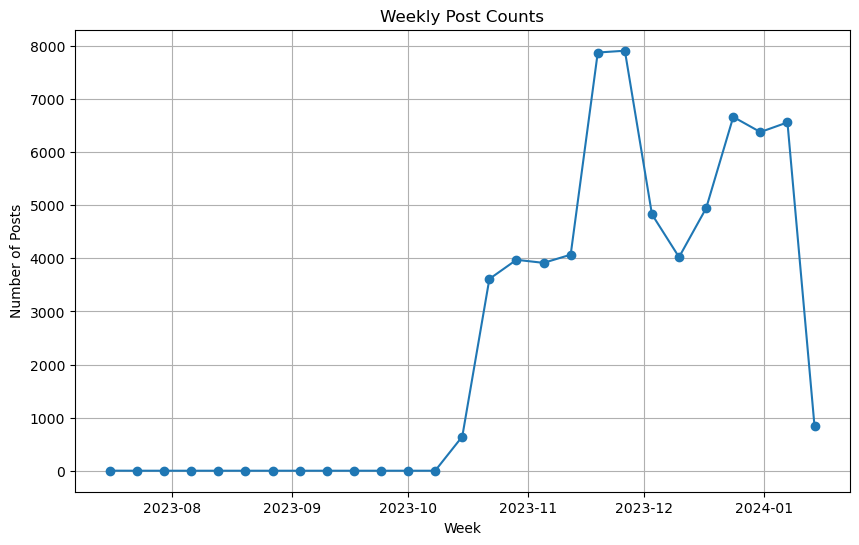

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 CSV 檔案有一個名為 'date' 的日期欄位
# 將 'your_data.csv' 替換為您的 CSV 檔案路徑
file_path = 'raw.csv'
data = pd.read_csv(file_path)

# 將 'date' 欄位轉換為 datetime 格式
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 按週分組並計算每週的發文數量
weekly_post_count = data.resample('W', on='date').size()

# 繪製數據
plt.figure(figsize=(10, 6))
plt.plot(weekly_post_count.index, weekly_post_count, marker='o')
plt.title('Weekly Post Counts')
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


# each author push,boo數量

In [18]:
import pandas as pd

# 讀取數據
file_path = 'message_count.csv' 
message_count_data = pd.read_csv(file_path)

# 將消息計數列轉換為數字類型
numeric_cols = ['message_count_all', 'message_count_boo', 'message_count_count', 'message_count_neutral', 'message_count_push']
message_count_data[numeric_cols] = message_count_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 按 'author' 匯總數據
aggregated_data = message_count_data.groupby('author')[numeric_cols].sum().reset_index()

# 顯示匯總後的數據前幾行
aggregated_data.head()


,author,message_count_all,message_count_boo,message_count_count,message_count_neutral,message_count_push
0,A1an (再說),26.0,1.0,7.0,17.0,8.0
1,A1bertPujols (The Machine),394.0,19.0,104.0,252.0,123.0
2,A330 (大鳥),12.0,4.0,-1.0,5.0,3.0
3,A4013 (),92.0,4.0,18.0,66.0,22.0
4,AAAB (),58.0,8.0,12.0,30.0,20.0


In [20]:
# Sorting the data by 'message_count_push' in descending order and getting the top 10 authors
top_10_push = aggregated_data.sort_values(by='message_count_push', ascending=False).head(10)
top_10_push

,author,message_count_all,message_count_boo,message_count_count,message_count_neutral,message_count_push
414,LeeSeDol (嘖嘖...),36940.0,4598.0,8083.0,19661.0,12681.0
2283,kcbill (明日やろうは馬鹿野郎だ),32982.0,3157.0,9403.0,17265.0,12560.0
2678,miler22020 (柯糞網軍頭子),34366.0,3133.0,9411.0,18689.0,12544.0
2881,oscarwu3041 (小羽毛),28477.0,3124.0,7678.0,14551.0,10802.0
2777,nicholas0406 (尼可拉斯),28233.0,2789.0,7282.0,15373.0,10071.0
735,TheoEpstein (Red Sox→Cubs→？),35485.0,1913.0,7681.0,23978.0,9594.0
2094,jacklyl (全力殲滅糞兔兔卡娜赫拉),24777.0,2427.0,5853.0,14070.0,8280.0
3796,xamous (一天死去一點),22754.0,2814.0,5097.0,12029.0,7911.0
2528,"lolahjy (我是貓,名字還沒有)",19975.0,1634.0,6220.0,10487.0,7854.0
294,Homura (德意志國防貓),19686.0,1582.0,6176.0,10346.0,7758.0


# each author 發文數量

In [22]:
# Calculating the number of posts for each author
posts_count_per_author = message_count_data.groupby('author').size().reset_index(name='posts_count')

# Sorting the data by the number of posts in descending order
sorted_posts_count_per_author = posts_count_per_author.sort_values(by='posts_count', ascending=False)

sorted_posts_count_per_author.head(10)  # Displaying the top few rows



,author,posts_count
3923,zeuswell (幫我想個有梗的暱稱),732
617,Rrrxddd (有噴 nlnlOeO RR ),449
2094,jacklyl (全力殲滅糞兔兔卡娜赫拉),361
414,LeeSeDol (嘖嘖...),345
2457,leon771170 (許肥),335
2881,oscarwu3041 (小羽毛),325
1347,chu (chu),311
2678,miler22020 (柯糞網軍頭子),307
2283,kcbill (明日やろうは馬鹿野郎だ),298
700,Supasizeit (Shitpost King),298


# 各用戶互動關係